In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

In [149]:
#Read in dataframe, obtained manually from Yahoo Sports (https://basketball.fantasysports.yahoo.com/nba/draftanalysis?tab=AD&pos=ALL&sort=DA_AP&count=0)
df = pd.read_csv('YahooData_15OCT2022.csv')
#print(df)
df.dtypes
#print(df.loc[1])

FirstName          object
LastName           object
Team               object
Position           object
ProjSalary          int64
AvgSalary         float64
PercentDrafted    float64
GP                  int64
PreSeason           int64
Current             int64
FGM                 int64
FGA                 int64
FG_PCT            float64
FTM                 int64
FTA                 int64
FT_PCT            float64
3PTM                int64
PTS                 int64
REB                 int64
AST                 int64
ST                  int64
BLK                 int64
TO                  int64
dtype: object

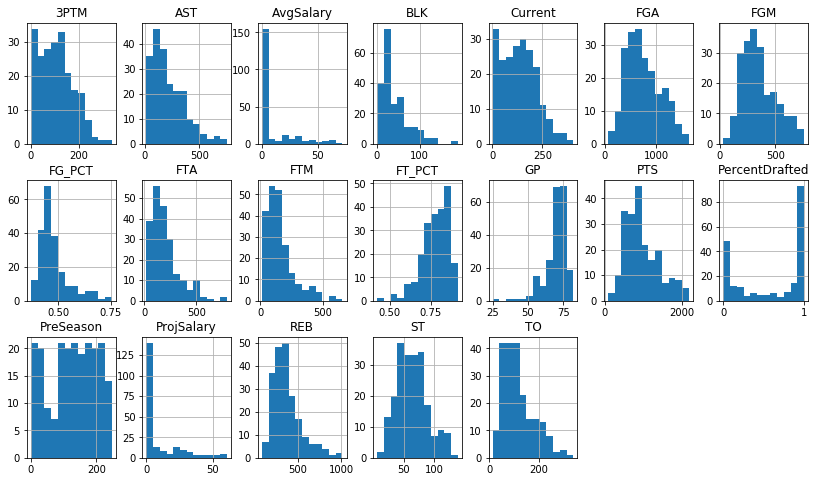

In [150]:
#Show 
df.hist(bins=12, figsize=(14,8), layout=(3,-1))
plt.show()

In [151]:
#See top 5 and bottom 5 players for a given stat
df.sort_values(by=['3PTM'], ascending=False)
#To see max value for each stat-> print(df.max())

,FirstName,LastName,Team,Position,ProjSalary,AvgSalary,PercentDrafted,GP,PreSeason,Current,FGM,FGA,FG_PCT,FTM,FTA,FT_PCT,3PTM,PTS,REB,AST,ST,BLK,TO
3,Stephen,Curry,GSW,PG,57,61.0,1.00,68,7,3,586,1240,0.473,290,317,0.915,337,1799,356,429,90,24,219
15,Damian,Lillard,POR,PG,41,44.1,0.99,72,14,15,601,1345,0.447,460,518,0.888,287,1949,297,552,42,24,205
58,Buddy,Hield,IND,"SG,SF",11,5.6,0.99,81,76,59,459,1111,0.413,94,106,0.887,270,1282,374,243,77,26,162
24,Fred,VanVleet,TOR,PG,31,30.8,0.99,68,20,23,448,1117,0.401,201,228,0.882,256,1353,297,446,114,31,175
140,Evan,Fournier,NYK,"SG,SF",0,1.2,0.40,80,165,105,417,989,0.422,86,116,0.741,249,1169,215,175,81,20,108
23,Anthony,Edwards,MIN,"SG,SF",31,33.3,0.99,78,19,10,647,1410,0.459,293,364,0.805,248,1835,378,301,121,51,210
8,Luka,Doncic,DAL,"PG,SG",50,60.7,1.00,74,5,12,756,1628,0.464,428,567,0.755,243,2183,688,658,87,42,339
19,Donovan,Mitchell,CLE,"PG,SG",35,33.4,0.99,74,23,32,622,1392,0.447,269,313,0.859,242,1755,281,356,99,11,200
6,Jayson,Tatum,BOS,"SF,PF",54,56.4,0.99,77,8,6,738,1601,0.461,409,480,0.852,240,2125,623,352,82,50,222
50,Desmond,Bane,MEM,"SG,SF",18,16.8,0.99,78,49,29,517,1124,0.460,136,158,0.861,236,1406,362,210,95,27,120


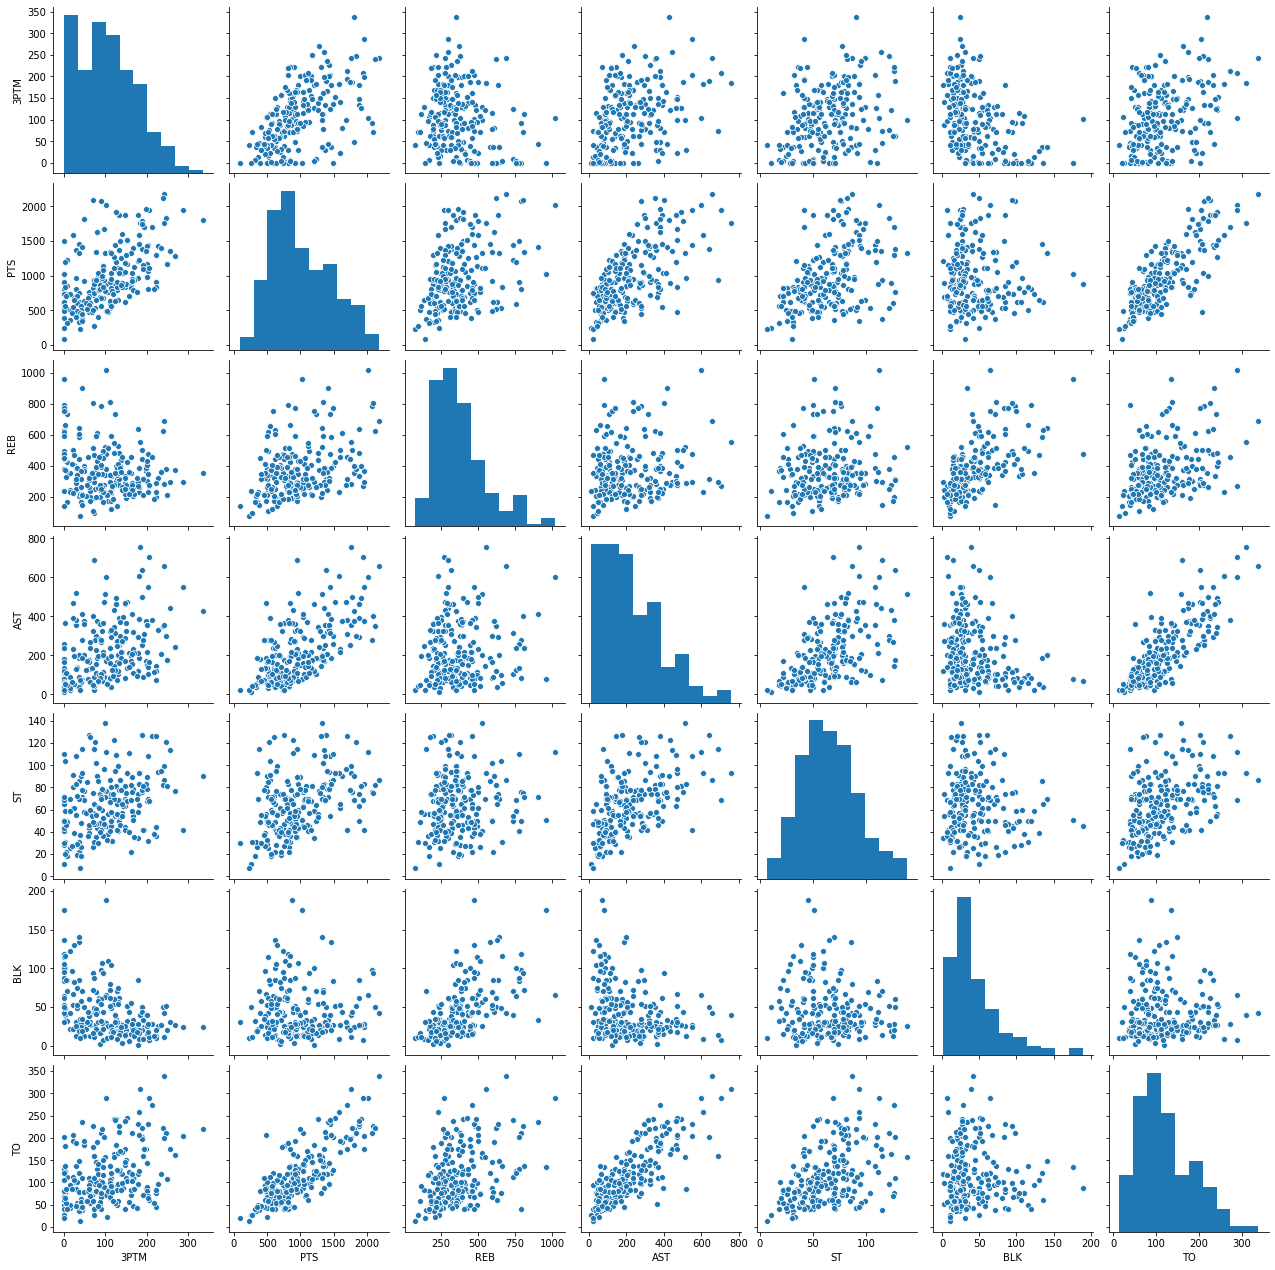

In [139]:
# Look at relationships between features
import seaborn as sns
sns.pairplot(df.iloc[:,16:23])  # this will take several minutes
plt.show()

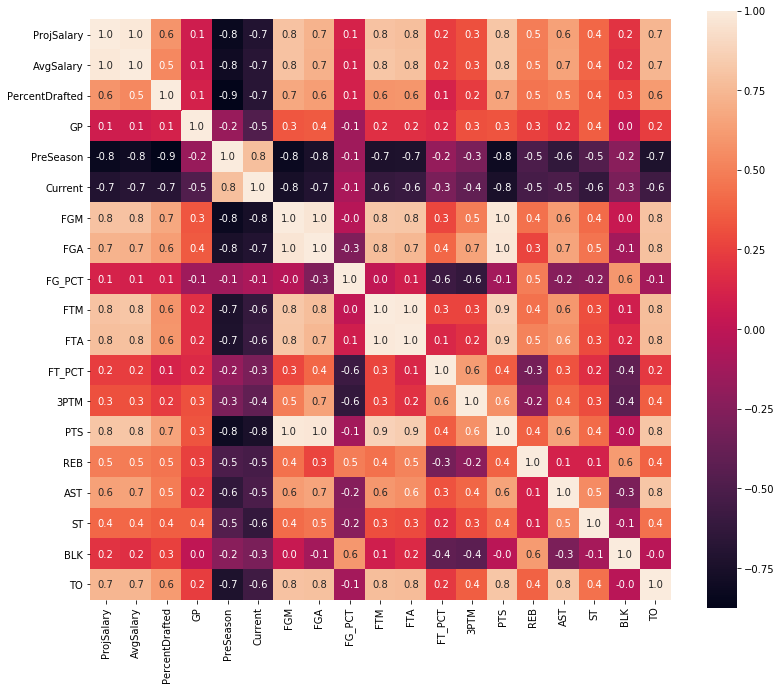

In [152]:
#Plot correlation coefficients
df2=df.iloc[:,4:23]
cm = np.corrcoef(df2.to_numpy().T)
import seaborn as sns
#sns.set(font_scale=0.5)
plt.figure(figsize=(13,11))
sns.heatmap(cm, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, 
            yticklabels=df2.columns, xticklabels=df2.columns)
plt.show()

In [153]:
df.Position.value_counts()

PG,SG       41
SF,PF       39
SG,SF       35
C           32
PF,C        31
PG          20
PF           9
SG           3
SF           2
SF,PF,C      1
PG,SG,SF     1
Name: Position, dtype: int64

In [179]:
#Create adjusted FG PCT and FT PCT values. Assume there are 9 other players with avg percentages and calculate
#the impact of the new player. This accounts for FG and FT volume differences.
i=0
avgft = 9
FG_PCT_ADJ = np.empty([len(df.index),1],dtype='float64')
FT_PCT_ADJ = np.empty([len(df.index),1],dtype='float64')
for i in range(i,len(df.index)):
    FG_PCT_ADJ[i,0] = ((df['FGM'].loc[df.index[i]] + avgft*avg['FGM']) / ((df['FGA'].loc[df.index[i]] + avgft*avg['FGA']))) - avg['FG_PCT']
    FT_PCT_ADJ[i,0] = ((df['FTM'].loc[df.index[i]] + avgft*avg['FTM']) / ((df['FTA'].loc[df.index[i]] + avgft*avg['FTA']))) - avg['FT_PCT']
#print(FG_PCT_ADJ)
df['FG_PCT_ADJ'] = FG_PCT_ADJ
df['FT_PCT_ADJ'] = FT_PCT_ADJ
df = df.sort_values(by=['FT_PCT_ADJ'], ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,FirstName,LastName,Team,Position,ProjSalary,AvgSalary,PercentDrafted,GP,PreSeason,Current,FGM,FGA,FG_PCT,FTM,FTA,FT_PCT,3PTM,PTS,REB,AST,ST,BLK,TO,FG_PCT_ADJ,FT_PCT_ADJ
4,Trae,Young,ATL,PG,57,57.4,0.99,75,9,17,629,1374,0.458,478,529,0.904,207,1943,272,704,69,7,290,-0.011035,0.034258
9,James,Harden,PHI,"PG,SG",49,52.9,1.00,75,6,4,508,1156,0.439,556,626,0.888,185,1757,555,758,93,39,309,-0.013394,0.033860
1,Kevin,Durant,BKN,"SF,PF",60,63.3,1.00,65,3,11,655,1318,0.497,433,483,0.896,134,1877,481,390,50,61,226,-0.004553,0.030951
15,Damian,Lillard,POR,PG,41,44.1,0.99,72,14,15,601,1345,0.447,460,518,0.888,287,1949,297,552,42,24,205,-0.012812,0.030357
20,DeMar,DeRozan,CHI,"SF,PF",33,29.5,1.00,77,33,42,645,1361,0.474,474,545,0.870,49,1813,397,379,69,24,183,-0.008310,0.027000
3,Stephen,Curry,GSW,PG,57,61.0,1.00,68,7,3,586,1240,0.473,290,317,0.915,337,1799,356,429,90,24,219,-0.008543,0.026979
28,Jimmy,Butler,MIA,"SF,PF",30,32.1,0.99,66,29,27,447,904,0.494,446,521,0.856,29,1369,385,357,108,31,138,-0.005984,0.023281
32,Kawhi,Leonard,LAC,"SG,SF",26,34.1,0.99,61,24,24,513,1093,0.469,334,382,0.874,135,1495,401,301,87,27,128,-0.009004,0.023112
17,Devin,Booker,PHX,"SG,SF",38,38.0,0.99,72,15,13,712,1523,0.468,338,389,0.869,199,1961,366,378,83,28,174,-0.009458,0.022372
18,Darius,Garland,CLE,PG,37,33.2,0.99,76,27,36,567,1224,0.463,268,302,0.887,183,1585,234,608,93,8,258,-0.009979,0.022272


In [180]:
#Get column averages and std
avg = df.mean(axis=0)
stdev = df.std(axis=0)
print(avg)
#print(avg['3PTM'])

ProjSalary          9.911215
AvgSalary          10.232243
PercentDrafted      0.603178
GP                 69.644860
PreSeason         127.051402
Current           134.285047
FGM               353.887850
FGA               749.985981
FG_PCT              0.480514
FTM               157.630841
FTA               200.093458
FT_PCT              0.779822
3PTM              105.182243
PTS               970.588785
REB               369.677570
AST               217.901869
ST                 64.495327
BLK                42.453271
TO                116.570093
FG_PCT_ADJ         -0.008607
FT_PCT_ADJ          0.007842
dtype: float64


In [181]:
#Calculate Z scores
i=0
z_three = np.empty([len(df.index),1],dtype='float64')
for i in range(i,len(df.index)):
    #print(df['3PTM'].loc[df.index[i]])
    z_three[i,0] =  ((df['3PTM'].loc[df.index[i]]) - (avg['3PTM'])) / (stdev['3PTM'])
#print(z_three)

In [187]:
#Calculate z scores for all relevant stats
zstats = df[['FG_PCT_ADJ','FT_PCT_ADJ','3PTM','PTS','REB','AST','ST','BLK','TO']].copy()
zstats = zstats.astype(float)
avgs = zstats.mean(axis=0)
stdevs = zstats.std(axis=0)
#print(avgs[0])
#print(zstats)
i=0
j=0
for j in range(0,len(zstats.columns)):
    for i in range(i,len(zstats)):
        zstats.iat[i,j] = ((zstats.iat[i,j]) - (avgs[j])) / (stdevs[j])
    i=0
zstats['Z_Sum'] = zstats.sum(axis=1)
zstats['TO'] = -zstats['TO']
zstats['FirstName'] = df['FirstName']
zstats['LastName'] = df['LastName']
zstats['ProjSalary'] = df['ProjSalary']
zstats.sort_values(by=['ProjSalary'], ascending=False)
#print(zstats.max())

    

,FG_PCT_ADJ,FT_PCT_ADJ,3PTM,PTS,REB,AST,ST,BLK,TO,Z_Sum,FirstName,LastName,ProjSalary
0,3.048611,0.776717,-0.030624,2.363414,3.854620,2.498678,1.822857,0.688629,-2.709738,17.732640,Nikola,Jokic,61
1,0.726554,2.667638,0.404401,2.043306,0.661871,1.125412,-0.556217,0.566460,-1.719692,9.359117,Kevin,Durant,60
2,0.982513,1.326352,-0.199020,2.500925,2.481203,0.412622,0.441459,1.696524,-1.499682,11.142259,Joel,Embiid,59
4,-0.435012,3.049364,1.428815,2.192088,-0.580745,3.178772,0.172854,-1.082824,-2.725453,10.648765,Trae,Young,57
3,0.011583,2.209155,3.253113,1.867472,-0.081320,1.380447,0.978670,-0.563605,-1.609687,10.665201,Stephen,Curry,57
5,1.371833,1.323029,1.035889,2.056832,1.589373,0.510712,0.364715,1.299475,-1.813982,11.365840,Karl-Anthony,Towns,55
6,-0.382901,1.576082,1.891906,2.602368,1.506136,0.876916,0.671692,0.230494,-1.656832,10.629526,Jayson,Tatum,54
7,2.450243,-2.010124,-0.479682,2.521213,2.594168,1.203884,0.403087,1.574355,-1.735407,9.992552,Giannis,Antetokounmpo,52
8,-0.269178,-0.896314,1.934005,2.733116,1.892596,2.877961,0.863553,-0.013844,-3.495488,12.617383,Luka,Doncic,50
9,-0.857863,3.003426,1.120088,1.772792,1.101840,3.531897,1.093786,-0.105471,-3.024038,13.684533,James,Harden,49
